In [62]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [63]:
path = 'C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Models/Results/'
model = 'model_*/'

Contents of the log : 
- loss train
- acc train 
- loss val 
- acc val 
- preds vec for the test set
- true vec for the test set

In [64]:
df_loss_train = pd.DataFrame()
df_acc_train = pd.DataFrame()
df_loss_val = pd.DataFrame()
df_acc_val = pd.DataFrame()
df_test_pred = pd.DataFrame()
df_test_label = pd.DataFrame()

logs_in = path + model

# Epoch data
for folder in glob.glob(logs_in):
    print(folder)
    for i, model_i in enumerate(glob.glob(folder + 'epoch_data_logs_*.csv')):
        print(model_i)

        log = pd.read_csv(model_i,index_col=0)

        # loss train
        df_loss_train = pd.concat([df_loss_train,pd.DataFrame(log['loss_train']).rename(columns={'loss_train':str(folder[len(path):-1])+'_'+str(i)})],axis=1)
        
        # acc train
        df_acc_train = pd.concat([df_acc_train,pd.DataFrame(log['acc_train'].str[7:13]).rename(columns={'acc_train':str(folder[len(path):-1])+'_'+str(i)}).astype(float)],axis=1)
        
        # loss val
        df_loss_val = pd.concat([df_loss_val,pd.DataFrame(log['loss_val']).rename(columns={'loss_val':str(folder[len(path):-1])+'_'+str(i)})],axis=1)
    
        # acc val
        df_acc_val = pd.concat([df_acc_val,pd.DataFrame(log['acc_val'].str[7:13]).rename(columns={'acc_val':str(folder[len(path):-1])+'_'+str(i)}).astype(float)],axis=1)

# Label data
for folder in glob.glob(logs_in):
    print(folder)
    for i, model_i in enumerate(glob.glob(folder + 'labels_logs_*.csv')):
        print(model_i)

        log = pd.read_csv(model_i,index_col=0)

        # test preds
        df_test_pred = pd.concat([df_test_pred,pd.DataFrame(log['preds_vec']).rename(columns={'preds_vec':str(folder[len(path):-1])+'_'+str(i)})],axis=1)
        
        # test label
        df_test_label = pd.concat([df_test_label,pd.DataFrame(log['true_vec']).rename(columns={'true_vec':str(folder[len(path):-1])+'_'+str(i)})],axis=1)

C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Models/Results\model_1\
C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Models/Results\model_1\epoch_data_logs_0.csv
C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Models/Results\model_1\epoch_data_logs_1.csv
C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Models/Results\model_1\epoch_data_logs_2.csv
C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Models/Results\model_1\epoch_data_logs_3.csv
C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Models/Results\model_1\epoch_data_logs_4.csv
C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Models/Results\model_10\
C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Models/Results\model_10\epoch_data_logs_0.csv
C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Char

In [65]:
from sklearn.metrics import accuracy_score
from scipy import stats

In [66]:
df_accuracies = pd.DataFrame()
for model in df_test_label.columns.values:
    df_accuracies.loc[0,model] = accuracy_score(df_test_label[model],df_test_pred[model])

In [67]:
def ttest(res_1,res_2):
    stat, p_value = stats.ttest_ind(res_1, res_2)
    return p_value

In [68]:
def significance_level(p_value):
    if p_value > 0.1:
        level = None
    elif (p_value <= 0.1) and (p_value > 0.05):
        level = '.'
    elif (p_value <= 0.05) and (p_value > 0.01):
        level = '*'
    elif (p_value <= 0.01) and (p_value > 0.001):
        level = '**'
    else:
        level = '***'
    return level

In [69]:
def add_bar(model_1,model_2,res_1,res_2,y,ax):
    """
    model_1,model_2 : int of the model tested
    ax : axis from matplotlib figure
    """
    ax.plot([pos[model_1],pos[model_1]],[y+1,y+3],'k')
    ax.plot([pos[model_1],pos[model_2]],[y+3,y+3],'k')
    ax.plot([pos[model_2],pos[model_2]],[y+3,y+1],'k')

    ax.text((pos[model_2]-pos[model_1])/2+pos[model_1], y+3, significance_level(ttest(res_1,res_2)),
         {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
          'bbox': dict( fc="white", ec="white", pad=2)})
    return y+5

In [70]:
res_1 = df_accuracies.iloc[0,(df_accuracies.columns.str[:-2] == 'model_1')]*100
res_2 = df_accuracies.iloc[0,(df_accuracies.columns.str[:-2] == 'model_2')]*100
res_6 = df_accuracies.iloc[0,(df_accuracies.columns.str[:-2] == 'model_6')]*100
res_8 = df_accuracies.iloc[0,(df_accuracies.columns.str[:-2] == 'model_8')]*100
res_10 = df_accuracies.iloc[0,(df_accuracies.columns.str[:-2] == 'model_10')]*100
res_12 = df_accuracies.iloc[0,(df_accuracies.columns.str[:-2] == 'model_12')]*100

In [71]:
results = [res_1,res_2,res_6,res_10,res_8,res_12]

In [72]:
means = np.mean(results,axis=1)
stds = np.std(results,axis=1)

[0, 1]
[1, 2]
[1, 3]
[3, 4]
[3, 5]


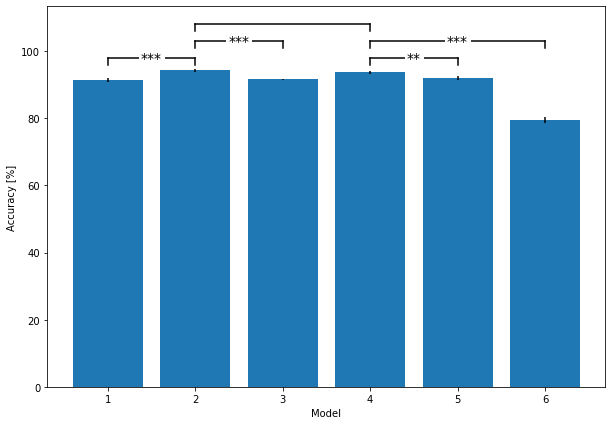

In [73]:
fig, ax = plt.subplots(figsize=(10,7))

pos = np.arange(1,len(results)+1)

ax.bar(pos,means,yerr=stds)

tests = {'0:1':[res_1,res_2],
        '1:2':[res_2,res_6],
        '1:3':[res_2,res_10]}

y = 95
for i in range(len(list(tests.keys()))) :
    models = [int(i) for i in list(tests.keys())[i].split(':')]
    print(models)
    res_1 = list(tests.values())[i][0]
    res_2 = list(tests.values())[i][1]
    y = add_bar(models[0],models[1],res_1,res_2,y,ax=ax)

tests = {'3:4':[res_10,res_8],
        '3:5':[res_10,res_12]}

y = 95
for i in range(len(list(tests.keys()))) :
    models = [int(i) for i in list(tests.keys())[i].split(':')]
    print(models)
    res_1 = list(tests.values())[i][0]
    res_2 = list(tests.values())[i][1]
    y = add_bar(models[0],models[1],res_1,res_2,y,ax=ax)
plt.ylabel('Accuracy [%]')
plt.xlabel('Model')
plt.savefig('model_comparison.png',dpi=600)

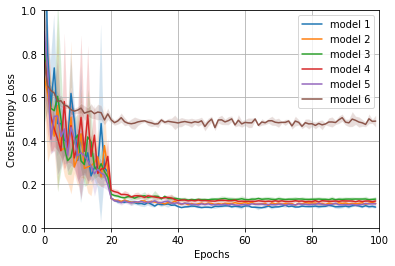

In [74]:
fig, ax = plt.subplots()
with sns.axes_style("darkgrid"):
    for i, model in enumerate(['model_1','model_2','model_6','model_8','model_10','model_12']):
        ax.plot(df_loss_val.iloc[:,(df_loss_val.columns.str[:-2] == model)].mean(axis=1),
                label=f"model {i+1}")
        
        ax.fill_between(range(100),
                    df_loss_val.iloc[:,(df_loss_val.columns.str[:-2] == model)].mean(axis=1)-df_loss_val.iloc[:,(df_loss_val.columns.str[:-2] == model)].std(axis=1),
                    df_loss_val.iloc[:,(df_loss_val.columns.str[:-2] == model)].mean(axis=1)+df_loss_val.iloc[:,(df_loss_val.columns.str[:-2] == model)].std(axis=1),
                        alpha=0.2)
plt.legend()    
plt.grid(True)
plt.xlim(0,100)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.savefig('val_loss.png',dpi=600)

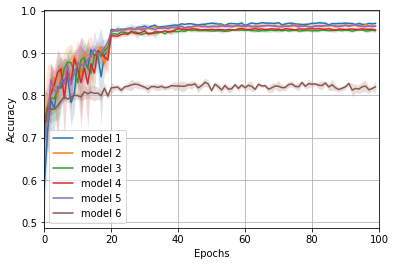

In [75]:
fig, ax = plt.subplots()
with sns.axes_style("darkgrid"):
    for i, model in enumerate(['model_1','model_2','model_6','model_8','model_10','model_12']):
        ax.plot(df_acc_val.iloc[:,(df_acc_val.columns.str[:-2] == model)].mean(axis=1),
                label=f"model {i+1}")
        
        ax.fill_between(range(100),
                    df_acc_val.iloc[:,(df_acc_val.columns.str[:-2] == model)].mean(axis=1)-df_acc_val.iloc[:,(df_acc_val.columns.str[:-2] == model)].std(axis=1),
                    df_acc_val.iloc[:,(df_acc_val.columns.str[:-2] == model)].mean(axis=1)+df_acc_val.iloc[:,(df_acc_val.columns.str[:-2] == model)].std(axis=1),
                        alpha=0.2)
plt.legend()    
plt.grid(True)
plt.xlim(0,100)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('val_acc.png',dpi=600)

In [140]:
from sklearn.metrics import f1_score,confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    bottom, top = ax.get_ylim()
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_ylim(bottom, top)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.grid(False)
    return ax

In [141]:
classes = np.array(['ML', 'MS','BL','GN','OL'])

[[177   3  10   1   9]
 [  0 198   1   0   1]
 [  3   0 194   0   3]
 [  0   5   0 195   0]
 [  1   4  16   0 179]]


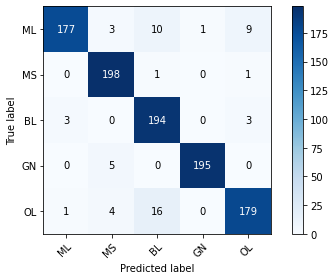

In [142]:
plot_confusion_matrix(df_test_label['model_10_1'],
                      df_test_pred['model_10_1'],
                      classes)
plt.savefig('confusion_matrix.png',dpi=600)